# Introduction to Information Theory

## Exercise 1

(entropy, implementation)

Consider two fair dice with 6 sides each.

1. Print the probability distribution of the sum $S$ of the numbers obtained by throwing the two dice.
1. What is the information content in bits of the events $S=2$, $S=11$, $S=5$, $S=7$.
1. Calculate the entropy of S.
1. Lets say you throw the die one at a time, and the first die shows 4. What is the entropy of S after this observation? Was any information gained/lost in the process of observing the outcome of the first die toss? If so, calculate how much information (in bits) was lost or gained.

## Exercise 2

(information gain, implementation or analysis)

Given the dataset below, calculate the information gain for the target variable 'Edible' and each feature ('Weight', 'Smell', 'Spots', 'Smooth'):

In [10]:
import pandas as pd
features = ['Weight', 'Smell', 'Spots', 'Smooth', 'Edible']
mushrooms = pd.DataFrame([
  (1, 0, 0, 0, 1),
  (1, 0, 1, 0, 1),
  (0, 1, 0, 1, 1),
  (0, 0, 0, 1, 0),
  (1, 1, 1, 0, 0),
  (1, 0, 1, 1, 0),
  (1, 0, 0, 1, 0),
  (0, 1, 0, 0, 0)
],
index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
columns=features)
print(mushrooms)

   Weight  Smell  Spots  Smooth  Edible
A       1      0      0       0       1
B       1      0      1       0       1
C       0      1      0       1       1
D       0      0      0       1       0
E       1      1      1       0       0
F       1      0      1       1       0
G       1      0      0       1       0
H       0      1      0       0       0


## Exercise 3

(entropy and information gain, implementation or analysis)

The following code simulates the season results for football team F:

In [2]:
from itertools import product
import pandas as pd
import random
random.seed(1)
opponents = ['Team ' + chr(ord('A') + i) for i in range(5)]
stadiums = ['Home', 'Away']
games = pd.DataFrame(list(product(opponents, stadiums))*2,
                     columns=['opponent', 'stadium'])
games['result'] = random.choices(["Win", "Loss", "Draw"],
                                 k=len(games))
games


,opponent,stadium,result
0,Team A,Home,Win
1,Team A,Away,Draw
2,Team B,Home,Draw
3,Team B,Away,Win
4,Team C,Home,Loss
5,Team C,Away,Loss
6,Team D,Home,Loss
7,Team D,Away,Draw
8,Team E,Home,Win
9,Team E,Away,Win


1. What is the entropy of the `result` $H(result)$ (ignoring all other variables)?
1. What are the average conditional entropies $H(result | stadium)$ and $H(result | opponent)$?
1. Which of the two variables is more important in deciding the result of a game? Answer this question by calculating the information gain for the two variables: $IG(result; stadium)$ and $IG(result;opponent)$.

In [3]:
# solution here:

# 1. What is the entropy of the `result` $H(result)$ (ignoring all other variables)?

import math
from collections import Counter
def entropy(data):
    n = len(data)
    counts = Counter(data)
    return -sum([counts[x]/n * math.log2(counts[x]/n) for x in counts])

print("Entropy of result:")
print(entropy(games['result']))

# 2. What are the average conditional entropies $H(result | stadium)$ and $H(result | opponent)$?

def conditional_entropy(data, variable):
    return sum([entropy(data[data[variable] == x]) * len(data[data[variable] == x]) / len(data) for x in set(data[variable])])

print("Conditional entropy of result given stadium:")
print(conditional_entropy(games, 'stadium'))

print("Conditional entropy of result given opponent:")
print(conditional_entropy(games, 'opponent'))

# 3. Which of the two variables is more important in deciding the result of a game? Answer this question by calculating the information gain for the two variables: $IG(result; stadium)$ and $IG(result;opponent)$.

def information_gain(data, variable):
    return entropy(data['result']) - conditional_entropy(data, variable)

print("Information gain of result given stadium:")
print(information_gain(games, 'stadium'))

print("Information gain of result given opponent:")
print(information_gain(games, 'opponent'))

print("The opponent is more important in deciding the result of a game.")
print("because the information gain of result given opponent is higher than the information gain of result given stadium.")


Entropy of result:
1.55887184844536
Conditional entropy of result given stadium:
0.9965784284662087
Conditional entropy of result given opponent:
1.5
Information gain of result given stadium:
0.5622934199791514
Information gain of result given opponent:
0.05887184844536009
The opponent is more important in deciding the result of a game.
because the information gain of result given opponent is higher than the information gain of result given stadium.


# Exercise 4

(entropy, implementation or analysis)

Consider the random variable $C$ "a person has a cold" and the random variable $T$ "outside temperature". The joint distribution of the two variables is given below:

In [13]:
import pandas as pd
d = pd.DataFrame({'T_Sunny': [0.3, 0.05], 
                  'T_Rainy': [0.2, 0.15], 
                  'T_Snowy': [0.1, 0.2]}, 
                 index=['C_No', 'C_Yes'])
d

,T_Sunny,T_Rainy,T_Snowy
C_No,0.30,0.20,0.1
C_Yes,0.05,0.15,0.2


1. Plot the pmf of $C$ and $T$.
1. Calculate $H(C)$, $H(T)$.
1. Calculate $H(C|T)$, $H(T|C)$. Does the temperature (T) reduce the uncertainty regarding someone having a cold (C)?

# Exercise 5

(decision tree, implementation)

Consider the Boolean expression $A \lor (B \land C)$. The corresponding truth table can be generated with:

In [7]:
from itertools import product
X = [list(c) for c in product([0,1], repeat=3)]
y = [A or (B and C) for A, B, C in X]

print(X)
print(y)


[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
[0, 0, 0, 1, 1, 1, 1, 1]


1. Fit a decision tree classifier on the truth table above and visualise the resulting tree. Make sure to use the entropy as a metric.
1. Is the tree above optimal? Can you find a decision tree with fewer levels or nodes that correctly represents this function?

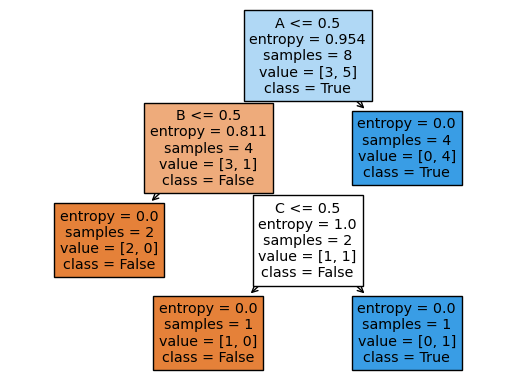

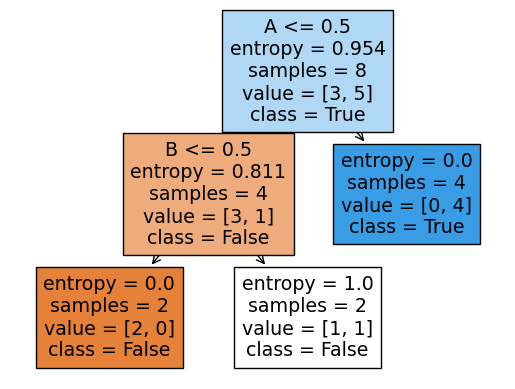

In [10]:
# solution here:

# 1. Fit a decision tree classifier on the truth table above and visualise the resulting tree. Make sure to use the entropy as a metric.

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X = [list(c) for c in product([0,1], repeat=3)]
y = [A or (B and C) for A, B, C in X]

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)
plot_tree(clf, feature_names=['A', 'B', 'C'], class_names=['False', 'True'], filled=True)
plt.show()

# 2. Is the tree above optimal? Can you find a decision tree with fewer levels or nodes that correctly represents this function?

# solution here:

clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X, y)
plot_tree(clf, feature_names=['A', 'B', 'C'], class_names=['False', 'True'], filled=True)
plt.show()
